In [5]:

import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/gold_price.csv", parse_dates=True, index_col='Date')
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [11]:
df['Return'] = df['USD (PM)'].pct_change() * 100
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()
train = df['2001':'2018']
test = df['2019-01-01':'2019-09-02']
# Create train and test sets for dependent and independent variables
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

In [12]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

# Load the dataset and parse the date column correctly
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/gold_price.csv", 
                 parse_dates=['Date'], index_col='Date')

# Check the date range to ensure it includes 2019
print(df.index.min(), df.index.max())

# Proceed with the data processing
df['Return'] = df['USD (PM)'].pct_change() * 100
df['Lagged_Return'] = df['Return'].shift()
df = df.dropna()

# Train-test split
train = df['2001':'2018']
test = df['2019-01-01':'2019-09-02']

# Create train and test sets for dependent and independent variables
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]


2001-01-02 00:00:00 2019-09-02 00:00:00


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

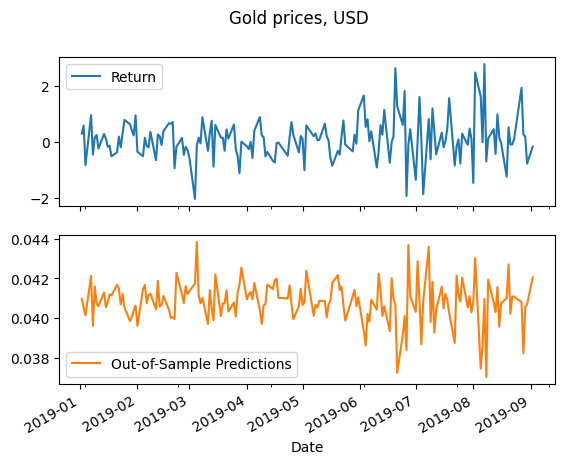

In [14]:
import matplotlib.pyplot as plt
out_of_sample_results = y_test.to_frame()
# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
out_of_sample_results.plot(subplots=True, title='Gold prices, USD')
plt.show()

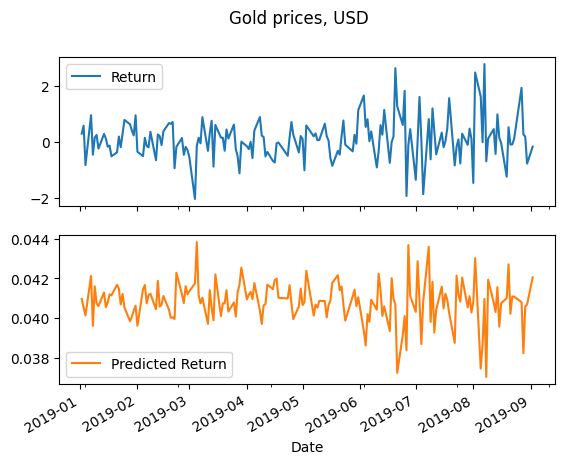

   Predicted Return
0          0.040971
1          0.040540
2          0.040140
3          0.042124
4          0.039615
5          0.041598
6          0.040735
7          0.040609
8          0.041293
9          0.040555


In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset and parse the date column correctly
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/gold_price.csv", 
                 parse_dates=['Date'], index_col='Date')

# Proceed with the data processing
df['Return'] = df['USD (PM)'].pct_change() * 100
df['Lagged_Return'] = df['Return'].shift()
df = df.dropna()

# Train-test split
train = df['2001':'2018']
test = df['2019-01-01':'2019-09-02']

# Create train and test sets for dependent and independent variables
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Create a DataFrame for predictions with an appropriate column name
predicted_df = pd.DataFrame(predictions, columns=['Predicted Return'])

# Add an index to align with the test set
predicted_df.index = X_test.index

# Display the predictions (first few rows)
# print(predicted_df.head())

# Optionally, plot the results
out_of_sample_results = y_test.to_frame()
out_of_sample_results["Predicted Return"] = predictions
out_of_sample_results.plot(subplots=True, title='Gold prices, USD')
plt.show()

# Print formatted predictions like in your example
print(predicted_df.reset_index(drop=True).head(10))
# print(predicted_df.head(10))